In [7]:
from morphology import *

Curvature:
Describe:
Gaussian curvature: DescribeResult(nobs=11933, minmax=(masked_array(data=-534.30273344,
             mask=False,
       fill_value=1e+20), masked_array(data=209.231522,
             mask=False,
       fill_value=1e+20)), mean=-0.13310002783306962, variance=48.37509187565998, skewness=masked_array(data=-41.43974706,
             mask=False,
       fill_value=1e+20), kurtosis=3205.1453258838815)
Mean Curvature: DescribeResult(nobs=11933, minmax=(masked_array(data=-175686.71095159,
             mask=False,
       fill_value=1e+20), masked_array(data=117845.2614735,
             mask=False,
       fill_value=1e+20)), mean=-19.107660895902086, variance=5780512.834950684, skewness=masked_array(data=-21.90259677,
             mask=False,
       fill_value=1e+20), kurtosis=3038.6368772320093)
Principal Curvature Min: DescribeResult(nobs=11922, minmax=(masked_array(data=-351373.42190229,
             mask=False,
       fill_value=1e+20), masked_array(data=1.72062666,
      

c:\users\admin\bric-morphology\morphology\__init__.py:125: RuntimeWarning: invalid value encountered in true_divide
  n = m/np.c_[p, p, p]
c:\users\admin\bric-morphology\morphology\__init__.py:141: RuntimeWarning: invalid value encountered in sqrt
  Pmax = H + np.sqrt(H**2 - K)
c:\users\admin\bric-morphology\morphology\__init__.py:142: RuntimeWarning: invalid value encountered in sqrt
  Pmin = H - np.sqrt(H**2 - K)
c:\users\admin\bric-morphology\morphology\__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
  _shape_index = 2/np.pi * np.arctan((p_max + p_min) / (p_max - p_min))


In [8]:
from itkwidgets import view

path = r"C:\Users\admin\bric-morphology\studies\1\data\Lesion.nii"
d = run(path)
print(d)

img = nib.load(path)
mri_3d_voxels = img.get_fdata()
mri_3d_voxels[mri_3d_voxels > 0] = 255

Curvature:
Describe:
Gaussian curvature: DescribeResult(nobs=11933, minmax=(masked_array(data=-534.30273344,
             mask=False,
       fill_value=1e+20), masked_array(data=209.231522,
             mask=False,
       fill_value=1e+20)), mean=-0.13310002783306962, variance=48.37509187565998, skewness=masked_array(data=-41.43974706,
             mask=False,
       fill_value=1e+20), kurtosis=3205.1453258838815)
Mean Curvature: DescribeResult(nobs=11933, minmax=(masked_array(data=-175686.71095159,
             mask=False,
       fill_value=1e+20), masked_array(data=117845.2614735,
             mask=False,
       fill_value=1e+20)), mean=-19.107660895902086, variance=5780512.834950684, skewness=masked_array(data=-21.90259677,
             mask=False,
       fill_value=1e+20), kurtosis=3038.6368772320093)
Principal Curvature Min: DescribeResult(nobs=11922, minmax=(masked_array(data=-351373.42190229,
             mask=False,
       fill_value=1e+20), masked_array(data=1.72062666,
      

invalid value encountered in true_divide
invalid value encountered in sqrt
invalid value encountered in sqrt
invalid value encountered in true_divide


In [9]:
d.isosurface.verts, d.isosurface.faces
import pyvista as pv

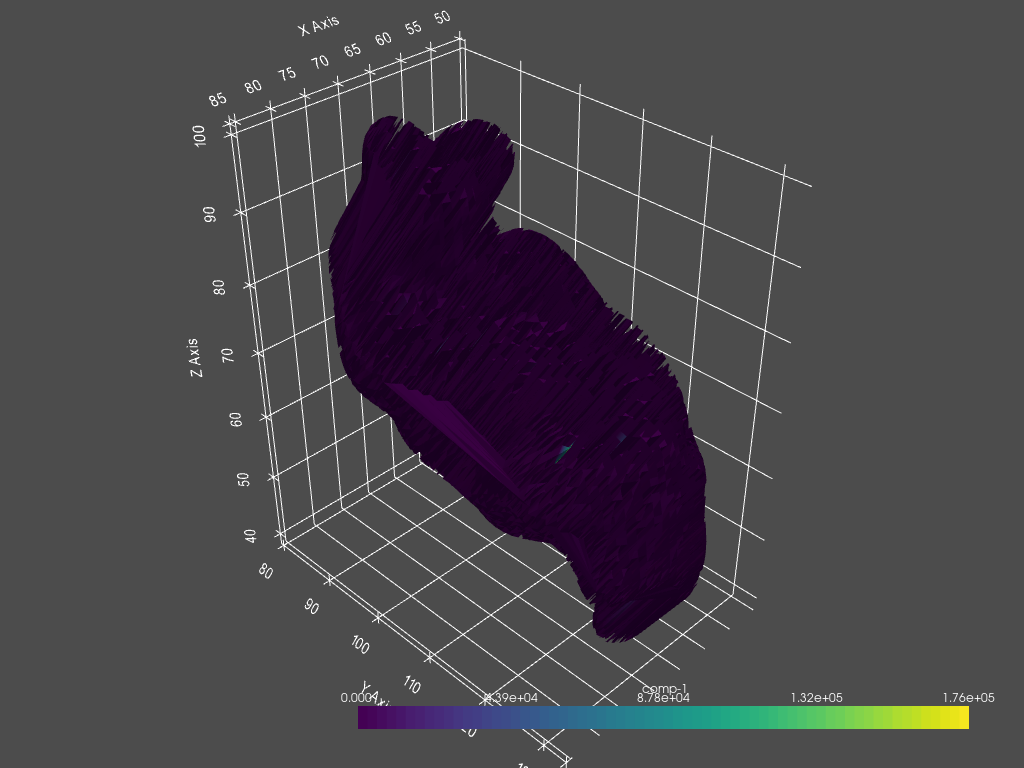

In [40]:
n = d.isosurface.verts.shape[0]
surf = pv.PolyData(d.isosurface.verts)
values = d.surface_measures.curvedness.flatten()[0:n]
values = np.nan_to_num(values)
surf.point_arrays['comp-1'] = values
surf = surf.delaunay_2d()
plotter = pv.Plotter()    # instantiate the plotter
plotter.show_grid()
plotter.add_mesh(surf)    # add a mesh to the scene
cpos = plotter.show()     # show the rendering window

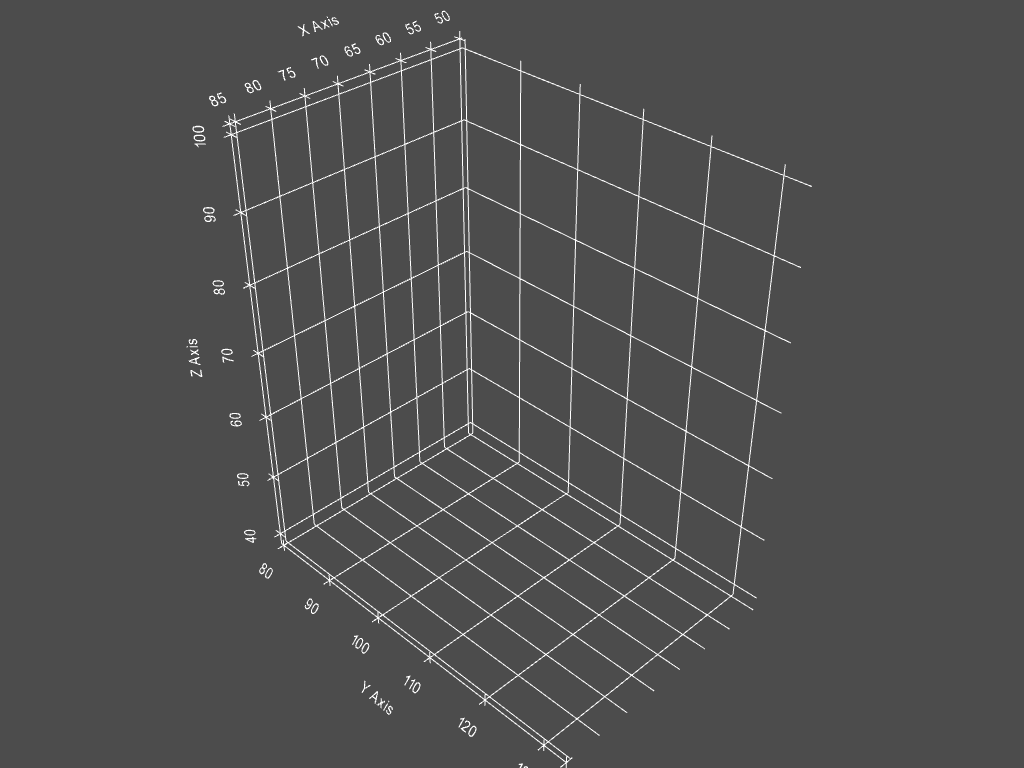

In [38]:
points = pv.PolyData(d.isosurface.verts)
surf.point_arrays['comp-1'] = values
grid = pv.StructuredGrid()
grid.points = d.isosurface.verts
grid.plot(show_edges=True, show_grid=True)

In [41]:
view(geometries=surf)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [11]:
from pyvista import examples
vol = examples.download_knee_full()
view(geometries=[vol])

In [27]:
vol

UniformGrid (0x24aab63ee20)
  N Cells:	10225800
  N Points:	10368384
  X Bounds:	0.000e+00, 1.497e+02
  Y Bounds:	0.000e+00, 1.786e+02
  Z Bounds:	0.000e+00, 2.000e+02
  Dimensions:	208, 248, 201
  Spacing:	7.230e-01, 7.230e-01, 1.000e+00
  N Arrays:	1

In [28]:
view(vol, geometries=vol.contour())

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [ ]:
import plotly
from plotly import version
print (version)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()

In [ ]:
import plotly.graph_objects as go
n = d.isosurface.verts.shape[0]
scale = 1
xs=d.isosurface.verts[0:n,0]*scale
ys=d.isosurface.verts[0:n,1]*scale
zs=d.isosurface.verts[0:n,2]*scale

values = d.surface_measures.curvedness.flatten()[0:n]
values = np.nan_to_num(values).tolist()
fig= go.Figure(
    data=[
        go.Mesh3d(
            x=xs,
            y=ys,
            z=zs,
            intensity = values,
            intensitymode='cell',
            flatshading=True,
        )
         ])
fig.show()
min(values), max(values)

In [ ]:
go.Mesh3d?

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(
  x = [2, 3, 1, 5],
  y = [['First', 'First', 'First', 'First'],
       ["A", "A", "A", "A"]],
  name = "A",
  orientation = "h"
))

fig.add_trace(go.Box(
  x = [8, 3, 6, 5],
  y = [['First', 'First', 'First', 'First'],
       ["B", "B", "B", "B"]],
  name = "B",
  orientation = "h"
))

fig.add_trace(go.Box(
  x = [2, 3, 2, 5],
  y = [['Second', 'Second', 'Second', 'Second'],
       ["C", "C", "C", "C"]],
  name = "C",
  orientation = "h"
))

fig.add_trace(go.Box(
  x = [7.5, 3, 6, 4],
  y = [['Second', 'Second', 'Second', 'Second'],
       ["D", "D", "D", "D"]],
  name = "D",
  orientation = "h"
))

fig.update_layout(title_text="Multi-category axis",)

fig.show()

In [ ]:
go.Isosurface

In [ ]:
np.column_stack([xs,ys,zs,values])

In [ ]:
d.isosurface.verts[0:-10], d.isosurface.verts[0:n,0]

In [ ]:
view(mri_3d_voxels)

In [ ]:
s  =np.nan_to_num(d.surface_measures.sharpness)

In [ ]:
s

In [ ]:
from sklearn.preprocessing import MinMaxScaler
r,c = d.isosurface.verts.shape
s = np.nan_to_num(d.surface_measures.sharpness)
scaler = MinMaxScaler()
scaler.fit(s)
s_normalized= scaler.transform(s)

opacities = s_normalized.flatten()[0:r+1]
opacities.shape

In [ ]:
arrs = [np.array([x]) for x in d.isosurface.verts.tolist()]

In [ ]:
n = 3
view(point_sets=arrs[0:n])

In [ ]:
arrs

In [ ]:
import itk
# Segment the cells
smoothed = itk.smoothing_recursive_gaussian_image_filter(mri_3d_voxels)

thresholded = itk.moments_threshold_image_filter(smoothed,
                                                 inside_value=0,
                                                 outside_value=1)

connected_components = itk.connected_component_image_filter(thresholded)

In [ ]:
view(label_image=connected_components)

In [ ]:
names = [(0, 'Background'), (1, 'First cell')]
viewer = view(smoothed,
              label_image=connected_components,
              label_image_names=names,
              label_image_blend=0.8,
              rotate=True,
              gradient_opacity=0.5,
              slicing_planes=True)
viewer

In [ ]:
import itkwidgets
itkwidgets.line_profile(mri_3d_voxels)

In [ ]:
itkwidgets.checkerboard(mri_3d_voxels, mri_3d_voxels)

In [ ]:
d.isosurface.verts.shape

In [42]:
d.isosurface.verts

array([[ 49.902462, 114.      ,  60.      ],
       [ 50.      , 114.      ,  59.5491  ],
       [ 50.      , 113.60634 ,  60.      ],
       ...,
       [ 85.34499 , 102.      ,  79.      ],
       [ 85.14975 , 103.      ,  77.      ],
       [ 85.186516, 103.      ,  78.      ]], dtype=float32)

In [43]:
d.isosurface.faces

array([[    2,     1,     0],
       [    4,     3,     0],
       [    0,     3,     2],
       ...,
       [11894, 11930, 11897],
       [11897, 11930, 11931],
       [11897, 11931, 11891]])

In [44]:
faces = np.hstack([[4, 0, 1, 2, 3],  # square
                   [3, 0, 1, 4],     # triangle
                   [3, 1, 2, 4]]) 

In [5]:
import numpy as np
vertices = np.array([[0, 0, 0],
                     [1, 0, 0],
                     [1, 1, 0],
                     [0, 1, 0],
                     [0.5, 0.5, -1]])

# mesh faces
faces = np.hstack([[4, 0, 1, 2, 3],  # square
                   [3, 0, 1, 4],     # triangle
                   [3, 1, 2, 4]])    # triangle
vertices,faces

(array([[ 0. ,  0. ,  0. ],
        [ 1. ,  0. ,  0. ],
        [ 1. ,  1. ,  0. ],
        [ 0. ,  1. ,  0. ],
        [ 0.5,  0.5, -1. ]]),
 array([4, 0, 1, 2, 3, 3, 0, 1, 4, 3, 1, 2, 4]))

In [143]:
n = d.isosurface.verts.shape[0]
faces_rows = d.isosurface.faces.shape[0]
faces = np.column_stack([3*np.ones((faces_rows,1),dtype=np.int),d.isosurface.faces])
vertices = d.isosurface.verts
faces_count = np.prod(faces.shape)
faces1 = faces.flatten()[0:faces_count]
vertices, faces
curvedness_surf = pv.PolyData(vertices, faces1)
curvedness = d.surface_measures.curvedness.flatten()[0:n]
curvedness = np.nan_to_num(curvedness)
curvedness_surf.point_arrays['curvedness'] = curvedness

shape_index_surf = pv.PolyData(vertices, faces1)
shape_index = d.surface_measures.shape_index.flatten()[0:n]
shape_index = np.nan_to_num(shape_index)
shape_index_surf.point_arrays['shape_index'] = shape_index

sharpness_surf = pv.PolyData(vertices, faces1)
sharpness = d.surface_measures.sharpness.flatten()[0:n]
sharpness = np.nan_to_num(shape_index)
sharpness_surf.point_arrays['sharpness'] = sharpness

total_curvature_surf = pv.PolyData(vertices, faces1)
total_curvature = d.surface_measures.total_curvature.flatten()[0:n]
total_curvature = np.nan_to_num(shape_index)
total_curvature_surf.point_arrays['total_curvature'] = total_curvature

point_cloud = pv.PolyData(vertices)

In [144]:
curvedness_surf, shape_index_surf, sharpness_surf, total_curvature_surf

(PolyData (0x17201714d60)
   N Cells:	23868
   N Points:	11932
   X Bounds:	4.956e+01, 8.576e+01
   Y Bounds:	7.950e+01, 1.336e+02
   Z Bounds:	3.818e+01, 1.013e+02
   N Arrays:	1,
 PolyData (0x17201714fa0)
   N Cells:	23868
   N Points:	11932
   X Bounds:	4.956e+01, 8.576e+01
   Y Bounds:	7.950e+01, 1.336e+02
   Z Bounds:	3.818e+01, 1.013e+02
   N Arrays:	1,
 PolyData (0x17201714580)
   N Cells:	23868
   N Points:	11932
   X Bounds:	4.956e+01, 8.576e+01
   Y Bounds:	7.950e+01, 1.336e+02
   Z Bounds:	3.818e+01, 1.013e+02
   N Arrays:	1,
 PolyData (0x172017149a0)
   N Cells:	23868
   N Points:	11932
   X Bounds:	4.956e+01, 8.576e+01
   Y Bounds:	7.950e+01, 1.336e+02
   Z Bounds:	3.818e+01, 1.013e+02
   N Arrays:	1)

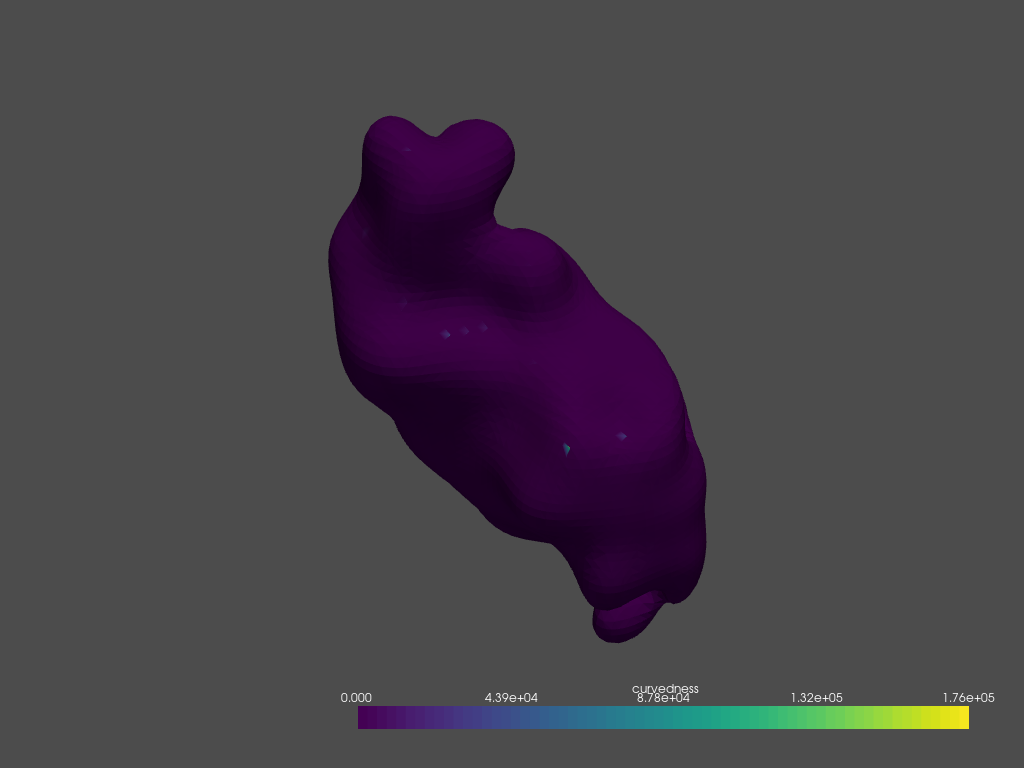

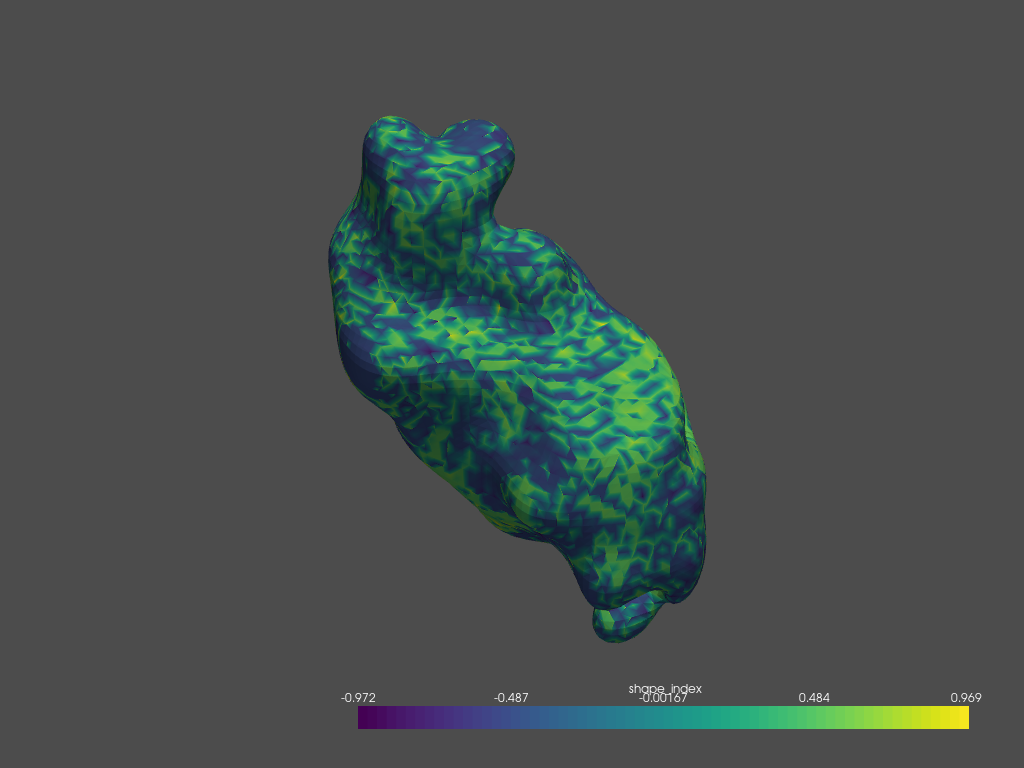

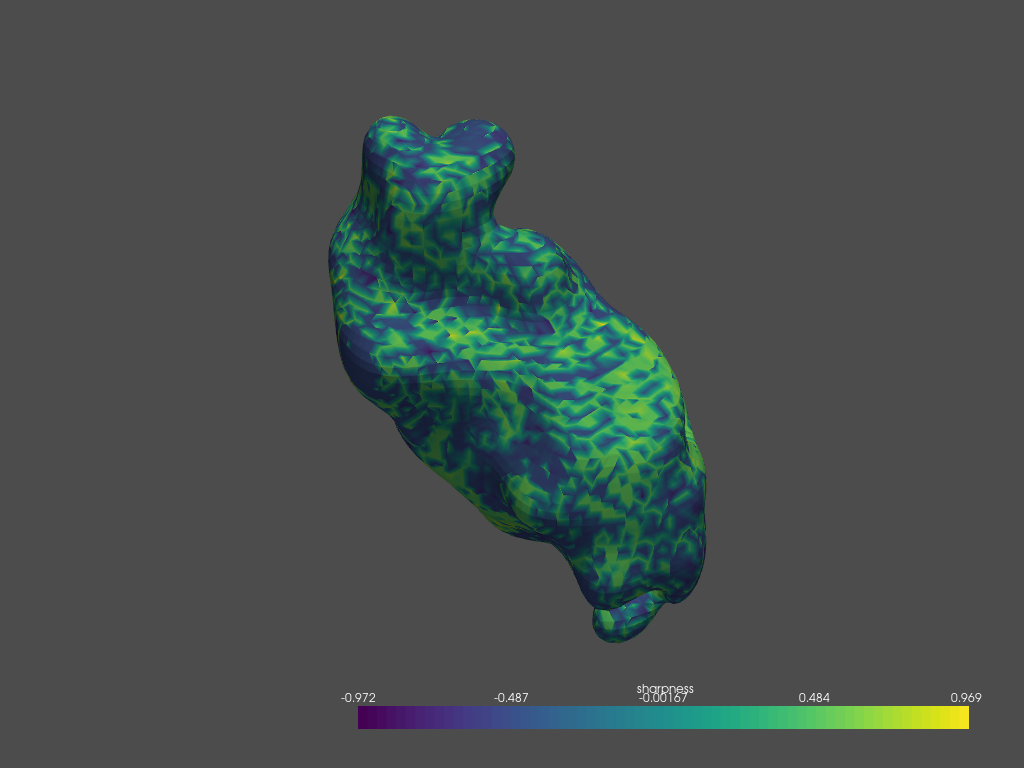

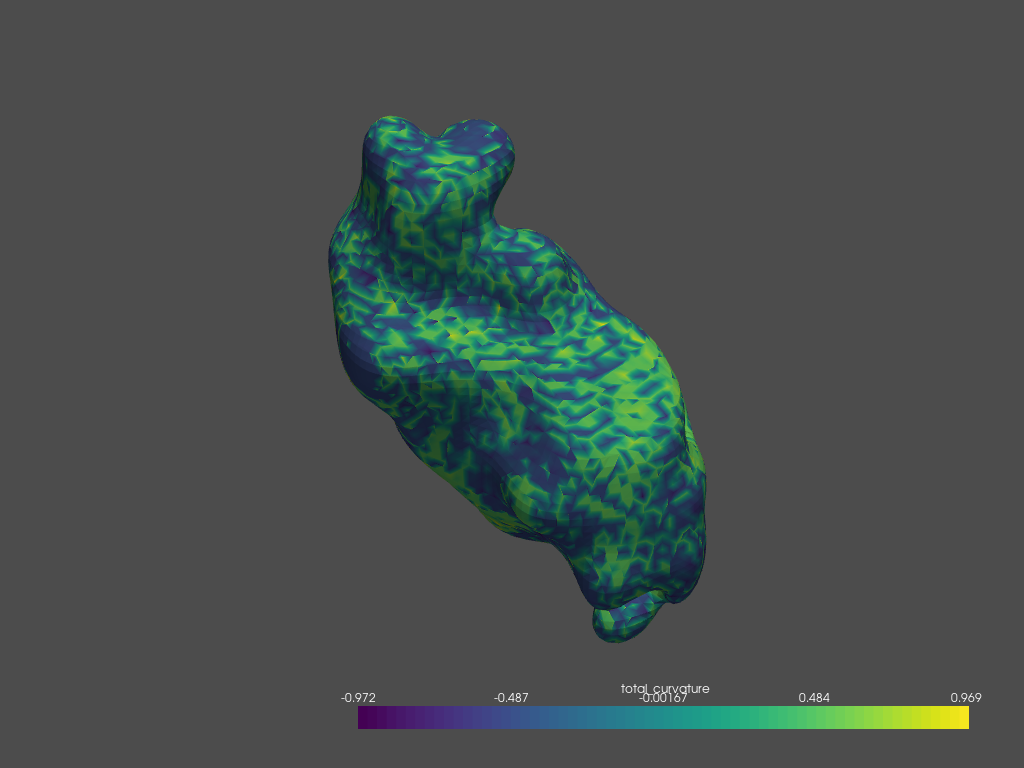

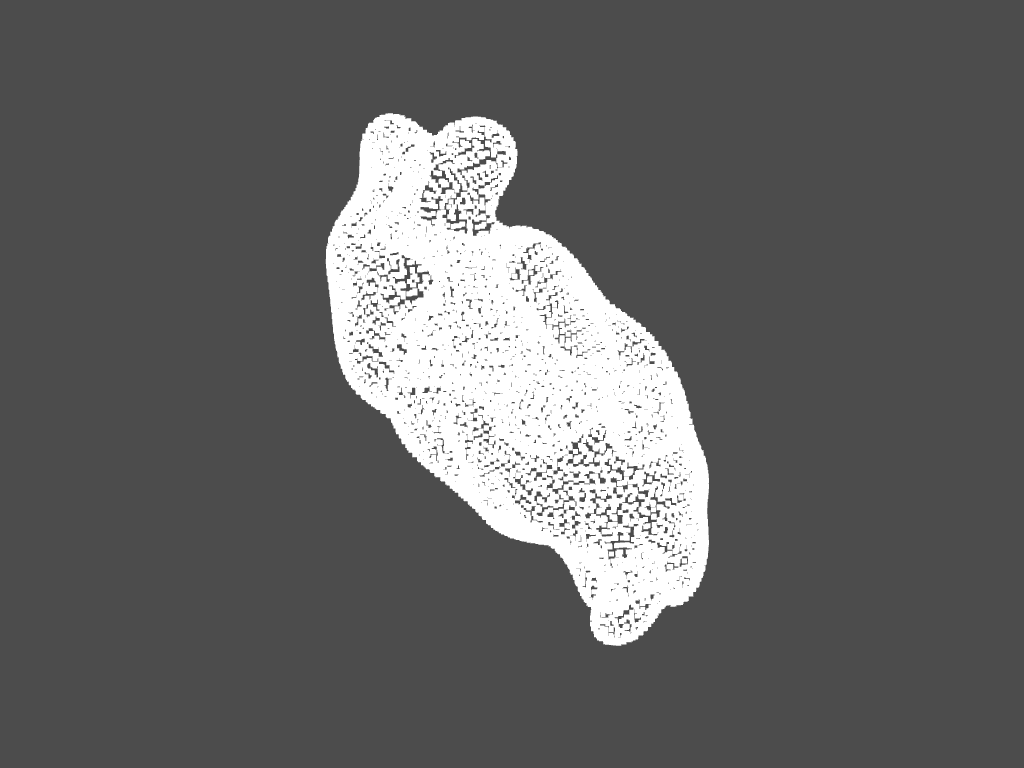

In [148]:
surfaces = [curvedness_surf, shape_index_surf, sharpness_surf, total_curvature_surf, point_cloud]
for graph in surfaces:
    graph.plot()

In [150]:
view(geometries=surfaces,axes=True,slicing_planes=True)

Viewer(axes=True, geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points…